In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/learn-ai-bbc/BBC News Train.csv
/kaggle/input/learn-ai-bbc/BBC News Sample Solution.csv
/kaggle/input/learn-ai-bbc/BBC News Test.csv


In [12]:
file_dir = '/kaggle/input/learn-ai-bbc/'
train_file = file_dir + 'BBC News Train.csv'
test_file = file_dir + 'BC News Test.csv'

submit_file = file_dir + 'BBC News Sample Solution.csv'

In [13]:
trainData = pd .read_csv(train_file)

In [14]:
trainData.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [15]:
trainData.Category.value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [16]:
def changeLabel(s):
    if s == 'sport':
        return 0;
    if s == 'business':
        return 1;
    if s == 'politics':
        return 2;
    if s == 'entertainment':
        return 3;
    if s == 'tech':
        return 4;
    
    

In [17]:
#print(changeLabel('business'))
trainData['Category'] = trainData['Category'].apply(lambda x : changeLabel(x) )


In [18]:
trainData['Category'].value_counts()

0    346
1    336
2    274
3    273
4    261
Name: Category, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [20]:
sentences = trainData['Text'].values

y = tf.keras.utils.to_categorical(trainData['Category'].values)

sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.20, random_state=1000)

In [21]:
y_train.shape

(1192, 5)

In [22]:
y_test.shape

(298, 5)

In [23]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [24]:
tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

In [25]:
print(X_train[:2])

[[2155, 2, 935, 54, 705, 2156, 705, 673, 27, 476, 1, 2860, 25, 4361, 34, 42, 7, 2155, 84, 429, 918, 172, 673, 2625, 2030, 4, 2216, 2286, 25, 1166, 8, 323, 21, 1, 6, 202, 7, 1230, 2031, 1019, 673, 4362, 2737, 2738, 4, 1189, 25, 45, 6, 1, 971, 8, 1, 305, 697, 6, 73, 84, 1019, 4120, 1, 936, 1099, 2737, 2434, 1, 1042, 17, 764, 1130, 225, 86, 705, 11, 9, 41, 81, 3869, 3870, 3, 1, 3871, 1231, 1302, 3324, 1, 3325, 3872, 4, 172, 84, 1617, 1693, 37, 19, 467, 1130, 2030, 9, 49, 3, 1, 2217, 2, 1694, 1, 86, 669, 429, 8, 93, 369, 18, 5, 6, 1, 477, 380, 84, 74, 2531, 21, 1, 918, 4121, 5, 1252, 839, 4, 422, 355, 1835, 17, 11, 7, 2, 16, 530, 21, 121, 2, 16, 12, 172, 11, 7, 91, 2218, 2157, 74, 90, 2997, 674, 387, 74, 14, 3326, 53, 93, 86, 669, 2626, 74, 13, 11, 7, 54, 3, 127, 1347, 51, 7, 680, 26, 55, 87, 26, 214, 530, 17, 5, 356, 3, 3327, 4, 32, 245, 144, 2, 20, 5, 91, 2218, 1835, 72, 2861, 6, 1, 86, 669, 1303, 520, 8, 4683, 8, 357, 3, 2287, 4, 73, 358, 3328, 3484, 46, 19, 66, 8, 93, 3152, 6, 3869, 38

In [26]:
vocab_size = len(tokenizer.word_index) + 1 
print(vocab_size)

22811


In [27]:
s = 'ab cd efg jk'
print(len(s.split(' ')))

4


In [28]:
text = trainData[['Text']]
lenList = []
#text.apply(lambda x : print(len(x) )) 
for s in text.Text.values :
    lenList.append(len(s.split(' ')))


In [29]:
text.head()

,Text
0,worldcom ex-boss launches defence lawyers defe...
1,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...
4,enron bosses in $168m payout eighteen former e...


In [30]:
import seaborn as sns

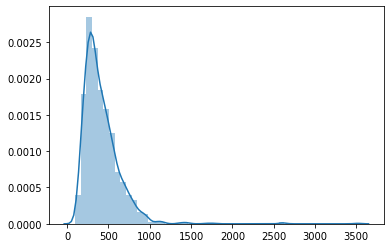

In [31]:
sns.distplot(lenList)

# length 

In [32]:
lenList.sort()
lenList[:3]

[94, 122, 133]

In [33]:
lenList.sort(reverse=True)
lenList[:3]

[3519, 2616, 2603]

In [34]:
maxlen = 3000

In [35]:
from keras.preprocessing.sequence import pad_sequences

In [36]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [37]:
X_train[:1]

array([[2155,    2,  935, ...,    0,    0,    0]], dtype=int32)

In [87]:
#from keras.models import Sequential
#from keras import layers
import tensorflow as tf

m = tf.keras.models
layers = tf.keras.layers


In [88]:
# vocab size is 1750 
# input_length is size of review text after tokenization and pad sequance
embedding_dim = 80
model = m.Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))

# model.add(layers.Flatten())
model.add(layers.GlobalMaxPool1D())


model.add(layers.Dense(2000, activation='relu'))
#model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))


model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 3000, 80)          1824880   
_________________________________________________________________
global_max_pooling1d_10 (Glo (None, 80)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 2000)              162000    
_________________________________________________________________
dense_44 (Dense)             (None, 100)               200100    
_________________________________________________________________
dense_45 (Dense)             (None, 5)                 505       
Total params: 2,187,485
Trainable params: 2,187,485
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [91]:
history = model.fit(X_train, y_train,
                    epochs=18,verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size = 15)
# batch size 10 or 20

Train on 1192 samples, validate on 298 samples
Epoch 1/18
1192/1192 [==============================] - 3s 2ms/sample - loss: 1.6016 - accuracy: 0.2366 - val_loss: 1.5921 - val_accuracy: 0.2013
Epoch 2/18
1192/1192 [==============================] - 2s 2ms/sample - loss: 1.3659 - accuracy: 0.3582 - val_loss: 1.1141 - val_accuracy: 0.4396
Epoch 3/18
1192/1192 [==============================] - 2s 2ms/sample - loss: 0.6821 - accuracy: 0.7659 - val_loss: 0.4254 - val_accuracy: 0.9027
Epoch 4/18
1192/1192 [==============================] - 2s 2ms/sample - loss: 0.1743 - accuracy: 0.9564 - val_loss: 0.2821 - val_accuracy: 0.9128
Epoch 5/18
1192/1192 [==============================] - 3s 2ms/sample - loss: 0.0409 - accuracy: 0.9958 - val_loss: 0.3212 - val_accuracy: 0.9027
Epoch 6/18
1192/1192 [==============================] - 2s 2ms/sample - loss: 0.0132 - accuracy: 0.9983 - val_loss: 0.2956 - val_accuracy: 0.9060
Epoch 7/18
1192/1192 [==============================] - 2s 2ms/sample - loss:

In [ ]:
embedding dim
maxlen
Learning rate of optimizer
.001


adam = 
model.compile(optimizer = tf.keras.optimizers.Adam(lr=.0005),
                   loss = 'categorical_crossentropy',
                metrics = ['accuracy'])